In [1]:
import torch
from gpsr.custom_cheetah.screen import Screen
from gpsr.modeling import GPSR, GPSRQuadScanLattice
from gpsr.train import train_gpsr, train_ensemble

from gpsr.beams import NNParticleBeamGenerator
from gpsr.datasets import QuadScanDataset

In [2]:
# create diagnostic screen:
n_pixels = 100
pixel_size = torch.tensor(1e-3)
screen = Screen(
    resolution=(n_pixels, n_pixels),
    pixel_size=torch.tensor((pixel_size, pixel_size)),
    method="kde",
    kde_bandwidth=pixel_size / 2,
    is_active=True,
)

# get model
p0c = 43.36e6  # reference momentum in eV/c

gpsr_lattice = GPSRQuadScanLattice(l_quad=0.1, l_drift=1.0, diagnostic=screen)

# get training dataset
train_dset = torch.load("example_data/example_datasets/reconstruction_4D_train.dset", weights_only=False)

In [3]:
gpsr_model = GPSR(NNParticleBeamGenerator(10000, p0c), gpsr_lattice)
train_loader = torch.utils.data.DataLoader(train_dset, batch_size=20)

result = train_ensemble(gpsr_model, train_loader, n_epochs=10, checkpoint_period_epochs=2)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Training model 1/5...



  | Name       | Type | Params | Mode 
--------------------------------------------
0 | gpsr_model | GPSR | 1.1 K  | train
--------------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.004     Total estimated model params size (MB)
17        Modules in train mode
0         Modules in eval mode
c:\Users\rroussel\AppData\Local\mambaforge\envs\gpsr\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
c:\Users\rroussel\AppData\Local\mambaforge\envs\gpsr\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:310: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name       | Type | Params | Mode 
--------------------------------------------
0 | gpsr_model | GPSR | 1.1 K  | train
--------------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.004     Total estimated model params size (MB)
18        Modules in train mode
0         Modules in eval mode


Training model 2/5...


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name       | Type | Params | Mode 
--------------------------------------------
0 | gpsr_model | GPSR | 1.1 K  | train
--------------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.004     Total estimated model params size (MB)
18        Modules in train mode
0         Modules in eval mode


Training model 3/5...


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name       | Type | Params | Mode 
--------------------------------------------
0 | gpsr_model | GPSR | 1.1 K  | train
--------------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.004     Total estimated model params size (MB)
18        Modules in train mode
0         Modules in eval mode


Training model 4/5...


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name       | Type | Params | Mode 
--------------------------------------------
0 | gpsr_model | GPSR | 1.1 K  | train
--------------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.004     Total estimated model params size (MB)
18        Modules in train mode
0         Modules in eval mode


Training model 5/5...


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [5]:
reconstructed_beams = [ele.beam_generator() for ele in result]

In [ ]:
from cheetah.particles import ParticleBeam
batched_beam = ParticleBeam(
    particles=torch.cat([beam.particles for beam in reconstructed_beams], dim=0),
    energy=reconstructed_beams[0].energy,
)

In [ ]:
test_dset = torch.load("example_data/example_datasets/reconstruction_4D_test.dset", weights_only=False)
test_pred = [ele(test_dset.parameters)[0].detach() for ele in result]


5

## Evaluate model on test samples to compare predictions

In [ ]:
test_dset = torch.load("example_data/example_datasets/reconstruction_4D_test.dset", weights_only=False)
test_pred = gpsr_model(test_dset.parameters)[0].detach()
test_pred_dset = QuadScanDataset(test_dset.parameters, test_pred, screen)

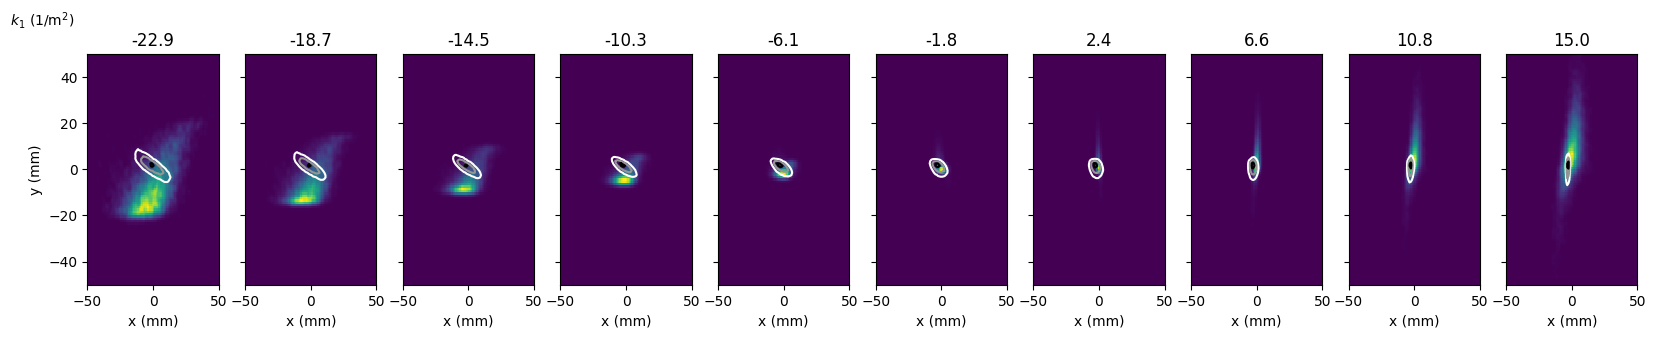

In [ ]:
fig, ax = test_dset.plot_data(overlay_data=test_pred_dset)
fig.set_size_inches(20, 3)

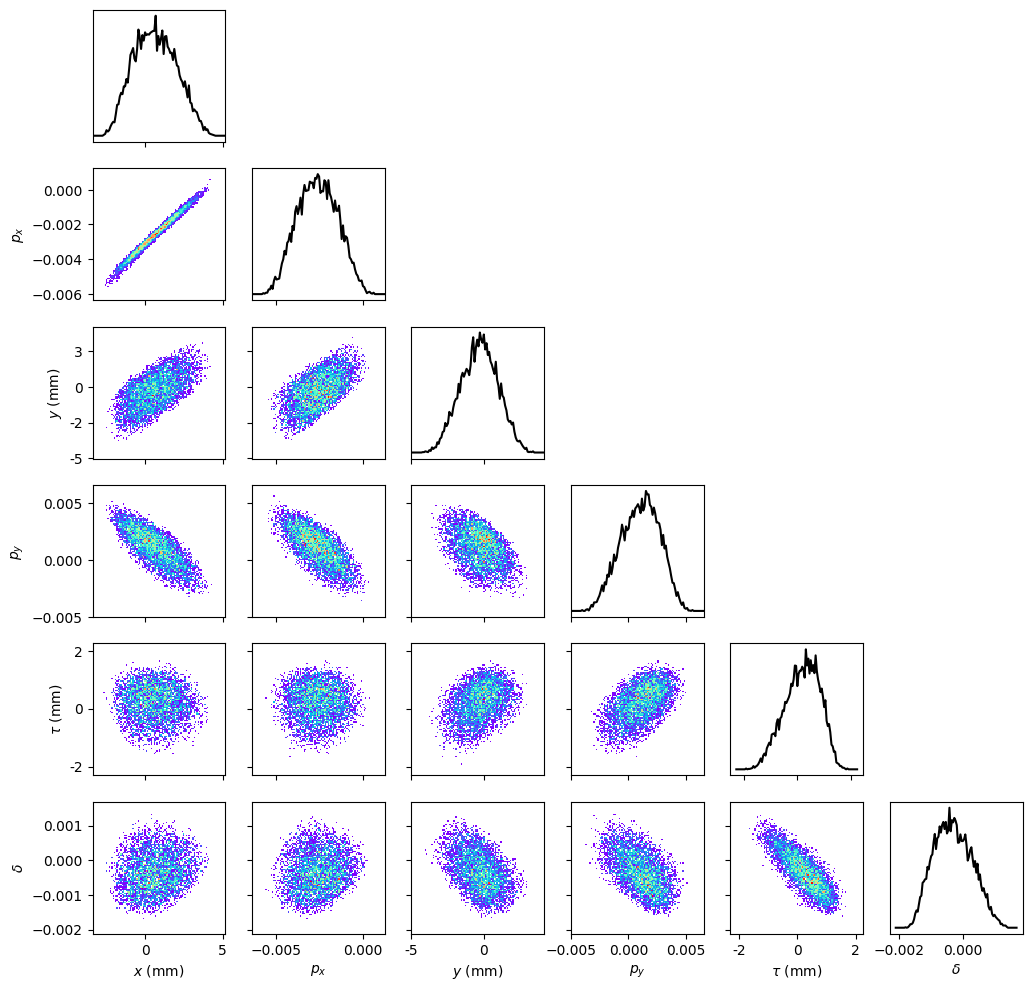

In [ ]:
reconstructed_beam.plot_distribution();